In [1]:
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
%matplotlib inline
import seaborn as sns
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [2]:
df=pd.read_csv("file:///F:/players_stats_by_season_full_details.csv")
df.head()

,League,Season,Stage,Player,Team,GP,MIN,FGM,FGA,3PM,...,birth_date,height,height_cm,weight,weight_kg,nationality,high_school,draft_round,draft_pick,draft_team
0,NBA,1999 - 2000,Regular_Season,Shaquille O'Neal,LAL,79,3163.0,956,1665,0,...,"Mar 6, 1972",7-1,216.0,325.0,147.0,United States,Robert G. Cole High School,1.0,1.0,Orlando Magic
1,NBA,1999 - 2000,Regular_Season,Vince Carter,TOR,82,3126.0,788,1696,95,...,"Jan 26, 1977",6-6,198.0,220.0,100.0,United States,Mainland High School,1.0,5.0,Golden State Warriors
2,NBA,1999 - 2000,Regular_Season,Karl Malone,UTA,82,2947.0,752,1476,2,...,"Jul 24, 1963",6-9,206.0,265.0,120.0,United States,Summerfield High School,1.0,13.0,Utah Jazz
3,NBA,1999 - 2000,Regular_Season,Allen Iverson,PHI,70,2853.0,729,1733,89,...,"Jun 7, 1975",6-0,183.0,165.0,75.0,United States,Bethel High School,1.0,1.0,Philadelphia Sixers
4,NBA,1999 - 2000,Regular_Season,Gary Payton,SEA,82,3425.0,747,1666,177,...,"Jul 23, 1968",6-4,193.0,180.0,82.0,United States,Skyline High School,1.0,2.0,Seattle SuperSonics


In [3]:
df=df[df.League=='Euroleague']
df.head()

,League,Season,Stage,Player,Team,GP,MIN,FGM,FGA,3PM,...,birth_date,height,height_cm,weight,weight_kg,nationality,high_school,draft_round,draft_pick,draft_team
342,Euroleague,2000 - 2001,International,Gregor Fucka,BOL,17,568.2,127,226,12,...,"Aug 7, 1971",7-1,216.0,216.0,98.0,Italy / Slovenia,NaN,NaN,NaN,NaN
343,Euroleague,2000 - 2001,International,Manu Ginobili,BOL,22,654.4,110,247,30,...,"Jul 28, 1977",6-6,198.0,205.0,93.0,Argentina,NaN,2.0,28.0,San Antonio Spurs
344,Euroleague,2000 - 2001,International,Elmer Bennett,CAJ,22,784.3,100,254,22,...,"Feb 13, 1970",6-0,183.0,171.0,78.0,United States,Bellaire High School,2.0,11.0,Atlanta Hawks
345,Euroleague,2000 - 2001,International,Alphonso Ford,PER,12,413.8,116,214,15,...,"Oct 31, 1971",6-1,185.0,190.0,86.0,United States,Amanda Elzy High School,2.0,5.0,Philadelphia Sixers
346,Euroleague,2000 - 2001,International,Sani Becirovic,OLI,15,485.9,94,221,28,...,"May 19, 1981",6-4,193.0,196.0,89.0,Slovenia,NaN,2.0,17.0,Denver Nuggets


In [4]:
df.Season.iloc[1].split("-")[1].split(" ")[1]

'2001'

In [5]:
# season is only equal to the last value
year = []
for i in range(len(df.Season)):
    year.append(df.Season.iloc[i].split("-")[1].split(" ")[1])

In [6]:
df.Season = year
df.head()

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,League,Season,Stage,Player,Team,GP,MIN,FGM,FGA,3PM,...,birth_date,height,height_cm,weight,weight_kg,nationality,high_school,draft_round,draft_pick,draft_team
342,Euroleague,2001,International,Gregor Fucka,BOL,17,568.2,127,226,12,...,"Aug 7, 1971",7-1,216.0,216.0,98.0,Italy / Slovenia,NaN,NaN,NaN,NaN
343,Euroleague,2001,International,Manu Ginobili,BOL,22,654.4,110,247,30,...,"Jul 28, 1977",6-6,198.0,205.0,93.0,Argentina,NaN,2.0,28.0,San Antonio Spurs
344,Euroleague,2001,International,Elmer Bennett,CAJ,22,784.3,100,254,22,...,"Feb 13, 1970",6-0,183.0,171.0,78.0,United States,Bellaire High School,2.0,11.0,Atlanta Hawks
345,Euroleague,2001,International,Alphonso Ford,PER,12,413.8,116,214,15,...,"Oct 31, 1971",6-1,185.0,190.0,86.0,United States,Amanda Elzy High School,2.0,5.0,Philadelphia Sixers
346,Euroleague,2001,International,Sani Becirovic,OLI,15,485.9,94,221,28,...,"May 19, 1981",6-4,193.0,196.0,89.0,Slovenia,NaN,2.0,17.0,Denver Nuggets


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3322 entries, 342 to 49288
Data columns (total 34 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   League       3322 non-null   object 
 1   Season       3322 non-null   object 
 2   Stage        3322 non-null   object 
 3   Player       3322 non-null   object 
 4   Team         3322 non-null   object 
 5   GP           3322 non-null   int64  
 6   MIN          3322 non-null   float64
 7   FGM          3322 non-null   int64  
 8   FGA          3322 non-null   int64  
 9   3PM          3322 non-null   int64  
 10  3PA          3322 non-null   int64  
 11  FTM          3322 non-null   int64  
 12  FTA          3322 non-null   int64  
 13  TOV          3322 non-null   int64  
 14  PF           3322 non-null   int64  
 15  ORB          3322 non-null   int64  
 16  DRB          3322 non-null   int64  
 17  REB          3322 non-null   int64  
 18  AST          3322 non-null   int64  
 19  STL

In [8]:
df["field_goal_per"] = df["FGM"] / df["FGA"] * 100
df.drop("FGM", axis = 1, inplace=True)
df.drop("FGA", axis = 1, inplace=True)

# calculate the three points success rate
df["three_points_per"] = df["3PM"] / df["3PA"] * 100
df.drop("3PM", axis = 1, inplace=True)
df.drop("3PA", axis = 1, inplace=True)

# calculate the free throws success rate
df["free_throws_per"] = df["FTM"] / df["FTA"] * 100
df.drop("FTM", axis = 1, inplace=True)
df.drop("FTA", axis = 1, inplace=True)

# drop the full birth date
df.drop("birth_date", axis = 1, inplace=True)

# drop height in feet
df.drop("height", axis = 1, inplace=True)

# drop weight in pounds
df.drop("weight", axis = 1, inplace=True)

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\pandas\core\frame.py:4315: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentatio

In [9]:
df = df.drop(['MIN', 'TOV', 'PF', 'PTS'], axis=1)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3322 entries, 342 to 49288
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   League            3322 non-null   object 
 1   Season            3322 non-null   object 
 2   Stage             3322 non-null   object 
 3   Player            3322 non-null   object 
 4   Team              3322 non-null   object 
 5   GP                3322 non-null   int64  
 6   ORB               3322 non-null   int64  
 7   DRB               3322 non-null   int64  
 8   REB               3322 non-null   int64  
 9   AST               3322 non-null   int64  
 10  STL               3322 non-null   int64  
 11  BLK               3322 non-null   int64  
 12  birth_year        3321 non-null   float64
 13  birth_month       3321 non-null   object 
 14  height_cm         3322 non-null   float64
 15  weight_kg         3264 non-null   float64
 16  nationality       3322 non-null   objec

In [11]:
df.describe()

,GP,ORB,DRB,REB,AST,STL,BLK,birth_year,height_cm,weight_kg,draft_round,draft_pick,field_goal_per,three_points_per,free_throws_per
count,3322.000000,3322.000000,3322.000000,3322.000000,3322.000000,3322.000000,3322.000000,3321.000000,3322.000000,3264.000000,871.000000,871.000000,3322.000000,3009.000000,3308.000000
mean,18.924142,18.192354,45.429561,63.621915,32.007225,15.281758,5.323299,1982.094550,199.319687,97.933211,1.702641,17.282434,46.451951,33.817297,74.315333
std,7.114474,15.327442,28.263994,40.819227,30.876125,9.548152,7.209448,6.493516,8.476272,12.198575,0.484215,8.482607,8.271128,13.720477,12.573556
min,3.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,1963.000000,165.000000,69.000000,1.000000,1.000000,16.000000,0.000000,0.000000
25%,13.000000,7.000000,24.000000,33.000000,12.000000,8.000000,1.000000,1977.000000,193.000000,88.000000,1.000000,11.000000,40.871152,28.571429,66.666667
50%,19.000000,14.000000,39.000000,54.000000,22.000000,13.000000,3.000000,1982.000000,201.000000,98.000000,2.000000,18.000000,45.623560,35.135135,75.694981
75%,24.000000,25.000000,60.000000,85.000000,40.000000,20.000000,7.000000,1987.000000,206.000000,107.000000,2.000000,24.000000,51.219512,40.650407,83.333333
max,37.000000,117.000000,202.000000,282.000000,286.000000,64.000000,68.000000,2002.000000,229.000000,170.000000,4.000000,30.000000,100.000000,100.000000,100.000000


In [12]:
# we have several values for each player on each year. we only care about their latest team since they will join euroleague with them.
df[df.Player =="Shane Larkin"]

,League,Season,Stage,Player,Team,GP,ORB,DRB,REB,AST,...,height_cm,weight_kg,nationality,high_school,draft_round,draft_pick,draft_team,field_goal_per,three_points_per,free_throws_per
33764,Euroleague,2017,International,Shane Larkin,CAJ,33,18,71,89,187,...,180.0,79.0,United States / Turkey,Dr. Phillips High School,1.0,18.0,Atlanta Hawks,40.579710,34.265734,79.687500
43224,Euroleague,2019,International,Shane Larkin,EFE,35,12,65,77,110,...,180.0,79.0,United States / Turkey,Dr. Phillips High School,1.0,18.0,Atlanta Hawks,49.819495,44.897959,86.607143
49054,Euroleague,2020,International,Shane Larkin,EFE,25,12,66,78,102,...,180.0,79.0,United States / Turkey,Dr. Phillips High School,1.0,18.0,Atlanta Hawks,52.996845,50.867052,90.344828


In [13]:
df = df.sort_values('Season', ascending=False).drop_duplicates('Player', keep='first')
df

,League,Season,Stage,Player,Team,GP,ORB,DRB,REB,AST,...,height_cm,weight_kg,nationality,high_school,draft_round,draft_pick,draft_team,field_goal_per,three_points_per,free_throws_per
49288,Euroleague,2020,International,Andrea Cinciarini,MIL,13,1,8,9,8,...,188.0,84.0,Italy,NaN,NaN,NaN,NaN,18.181818,16.666667,25.000000
49126,Euroleague,2020,International,Arturas Milaknis,ZAL,28,7,34,41,17,...,193.0,90.0,Lithuania,NaN,NaN,NaN,NaN,46.621622,39.473684,83.333333
49138,Euroleague,2020,International,George Papagiannis,PAN,27,42,86,128,6,...,218.0,125.0,Greece,Westtown School,1.0,13.0,Phoenix Suns,62.043796,0.000000,66.666667
49137,Euroleague,2020,International,Fabien Causeur,RMB,25,9,28,37,37,...,191.0,90.0,France,NaN,NaN,NaN,NaN,54.814815,47.272727,65.000000
49136,Euroleague,2020,International,Quim Colom,VAL,26,5,35,40,109,...,188.0,88.0,Andorra / Spain,NaN,NaN,NaN,NaN,36.904762,31.460674,70.909091
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
457,Euroleague,2001,International,Andrea Camata,STV,11,24,53,77,6,...,213.0,132.0,Italy,NaN,NaN,NaN,NaN,68.333333,NaN,63.636364
455,Euroleague,2001,International,Francisco Elson,FCB,12,30,40,70,7,...,213.0,107.0,Netherlands / South Sudan,Maria Regina M.A.V.O.,2.0,12.0,Denver Nuggets,61.666667,NaN,45.945946
447,Euroleague,2001,International,Dusan Stevic,LUG,10,18,29,47,0,...,208.0,NaN,Libya,NaN,NaN,NaN,NaN,45.238095,32.258065,52.380952
454,Euroleague,2001,International,Wouter De Wilde,SPI,10,4,14,18,2,...,203.0,NaN,Belgium,NaN,NaN,NaN,NaN,47.058824,51.162791,46.153846


In [14]:
df[df.Player =="Shane Larkin"]

,League,Season,Stage,Player,Team,GP,ORB,DRB,REB,AST,...,height_cm,weight_kg,nationality,high_school,draft_round,draft_pick,draft_team,field_goal_per,three_points_per,free_throws_per
49054,Euroleague,2020,International,Shane Larkin,EFE,25,12,66,78,102,...,180.0,79.0,United States / Turkey,Dr. Phillips High School,1.0,18.0,Atlanta Hawks,52.996845,50.867052,90.344828


In [15]:
df = df.reset_index()

In [16]:
df = df.drop("index", axis = 1)

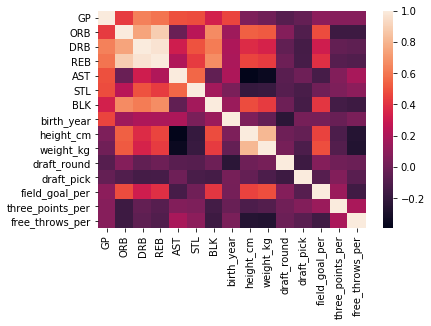

In [17]:
corr = df.corr()
sns.heatmap(corr);

In [18]:
df.Team.value_counts()

UNI     63
MAC     56
OLY     54
ZAL     52
MIL     50
        ..
RHEI     3
OOS      3
PAOK     2
NIZ      2
DYN      2
Name: Team, Length: 80, dtype: int64

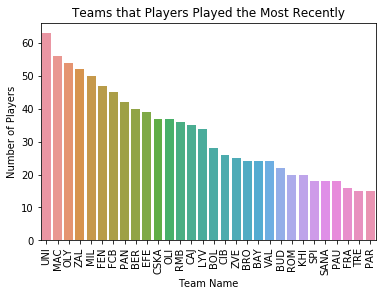

In [19]:
df.Team.value_counts().head(30).index
df.Team.value_counts().head(30).values

sns.barplot(x= df.Team.value_counts().head(30).index, y=df.Team.value_counts().head(30).values)
plt.xticks(rotation=90)
plt.xlabel("Team Name")
plt.ylabel("Number of Players")
plt.title("Teams that Players Played the Most Recently");

In [20]:
top_nationalities = df.nationality.value_counts().head(30)


Text(0.5, 1.0, 'Nationality of Players')

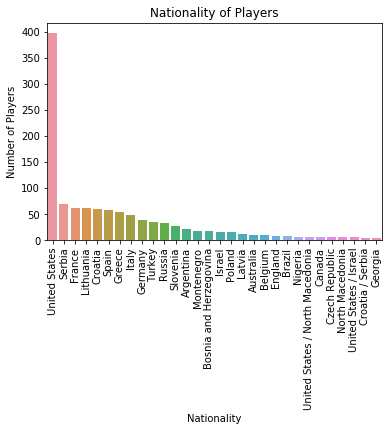

In [21]:
sns.barplot(x = top_nationalities.index, y = top_nationalities.values)
plt.xticks(rotation=90)
plt.xlabel("Nationality")
plt.ylabel("Number of Players")
plt.title("Nationality of Players")

In [22]:
high_school = df["high_school"].value_counts().head(20)

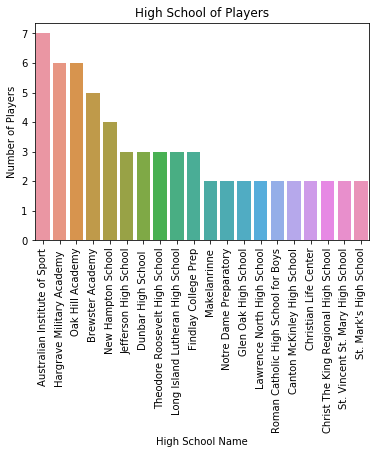

In [23]:
sns.barplot(x = high_school.index, y = high_school.values)
plt.xticks(rotation=90)
plt.xlabel("High School Name")
plt.ylabel("Number of Players")
plt.title("High School of Players");

In [24]:
# I will drop the high school columns since it is not a good predictor
df.drop("high_school", axis = 1, inplace=True)

In [27]:
df.head()

,League,Season,Stage,Player,Team,GP,ORB,DRB,REB,AST,...,birth_month,height_cm,weight_kg,nationality,draft_round,draft_pick,draft_team,field_goal_per,three_points_per,free_throws_per
0,Euroleague,2020,International,Andrea Cinciarini,MIL,13,1,8,9,8,...,Jun,188.0,84.0,Italy,NaN,NaN,NaN,18.181818,16.666667,25.000000
1,Euroleague,2020,International,Arturas Milaknis,ZAL,28,7,34,41,17,...,Jun,193.0,90.0,Lithuania,NaN,NaN,NaN,46.621622,39.473684,83.333333
2,Euroleague,2020,International,George Papagiannis,PAN,27,42,86,128,6,...,Jul,218.0,125.0,Greece,1.0,13.0,Phoenix Suns,62.043796,0.000000,66.666667
3,Euroleague,2020,International,Fabien Causeur,RMB,25,9,28,37,37,...,Jun,191.0,90.0,France,NaN,NaN,NaN,54.814815,47.272727,65.000000
4,Euroleague,2020,International,Quim Colom,VAL,26,5,35,40,109,...,Nov,188.0,88.0,Andorra / Spain,NaN,NaN,NaN,36.904762,31.460674,70.909091


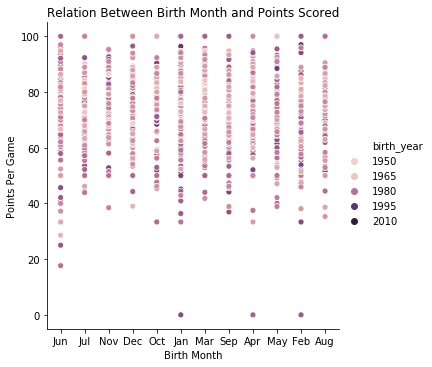

In [29]:
# check if a specific birth month brings more points

sns.relplot(x="birth_month", y="free_throws_per", data=df, kind="scatter", hue="birth_year")
plt.xlabel("Birth Month")
plt.ylabel("Points Per Game")
plt.title("Relation Between Birth Month and Points Scored");

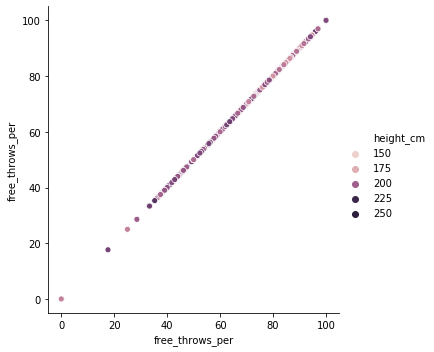

In [31]:
sns.relplot(x="free_throws_per", y="free_throws_per", data=df, kind="scatter", hue="height_cm");

In [32]:
df.isna().sum()

League                 0
Season                 0
Stage                  0
Player                 0
Team                   0
GP                     0
ORB                    0
DRB                    0
REB                    0
AST                    0
STL                    0
BLK                    0
birth_year             1
birth_month            1
height_cm              0
weight_kg             47
nationality            0
draft_round         1033
draft_pick          1033
draft_team          1033
field_goal_per         0
three_points_per     132
free_throws_per       11
dtype: int64

In [34]:
# all missing except month and year
df["weight_kg"].fillna(df["weight_kg"].mean, inplace=True)
df["draft_team"].fillna("missing", inplace=True)
df["draft_round"].fillna(df["draft_round"].mean(), inplace=True)
df["draft_pick"].fillna(df["draft_pick"].mean(), inplace=True)
df["three_points_per"].fillna(df["three_points_per"].mean(), inplace=True)
df["free_throws_per"].fillna(df["free_throws_per"].mean(), inplace=True)

In [35]:
df[df["birth_month"].isna()]

,League,Season,Stage,Player,Team,GP,ORB,DRB,REB,AST,...,birth_month,height_cm,weight_kg,nationality,draft_round,draft_pick,draft_team,field_goal_per,three_points_per,free_throws_per
1294,Euroleague,2001,International,Richard Mandeville,ZAD,10,7,26,33,3,...,NaN,213.0,120.0,United States,1.712418,16.852941,missing,56.0,0.0,75.0


In [36]:
# will drop this row since it belongs to a player from an older season
df = df.drop(df.iloc[1294].name, axis = 0)
df = df.reset_index()

In [37]:
df.isna().sum().sum()

0

In [38]:
df.drop("League", axis = 1, inplace = True)

In [39]:
df.drop("Stage", axis = 1, inplace = True)

In [40]:
df.isna().sum()

index               0
Season              0
Player              0
Team                0
GP                  0
ORB                 0
DRB                 0
REB                 0
AST                 0
STL                 0
BLK                 0
birth_year          0
birth_month         0
height_cm           0
weight_kg           0
nationality         0
draft_round         0
draft_pick          0
draft_team          0
field_goal_per      0
three_points_per    0
free_throws_per     0
dtype: int64

In [41]:
# weight column to numeric
df['Season'] = pd.to_numeric(df['Season'], errors='coerce')
df.drop("weight_kg", axis = 1, inplace = True)

In [42]:
cat_col = ["Player", "Team", "birth_month", "nationality", "draft_team"]

In [43]:
dummies = pd.get_dummies(df[cat_col])

In [44]:
df = df.drop(cat_col, axis = 1)
df = pd.concat([df, dummies], axis = 1)

In [45]:
df = df.drop("index", axis = 1)

In [46]:
set(df.columns) - set(df.select_dtypes(include=np.number).columns.tolist())

set()

In [48]:
# can we predict points per game
X = df.drop("draft_round", axis = 1)
y = df["draft_round"]

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=50)

In [50]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import linear_model

In [51]:
model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.006041442866316471

In [53]:
model = LinearRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

-0.1874087201778909